# Logistic Regression

#### y -> Whether the client has subscribed a term deposit or not; Binomial ("yes" or "no")


## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install -U scikit-learn==1.1.0

In [3]:
!pip install -U imbalanced-learn

## Import Data

In [3]:
Bank_Data=pd.read_table("C:\\ExcelR\\Assignments\\Logistic Regression\\bank-full.csv",sep=';')
pd.options.display.max_columns=None

Bank_Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data Understanding

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

   #### related with the last contact of the current campaign:
   
9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

   #### other attributes:
   
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


   #### Output variable (desired target):
   
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [4]:
Bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
fig,axes=plt.subplots(2,2)
plt.figure(figsize=[15,15])

fig.set_figheight(15)
fig.set_figwidth(15)

sns.kdeplot(x="age", data=Bank_Data,ax=axes[0,0])

sns.kdeplot(x="balance", data=Bank_Data,ax=axes[0,1])

sns.kdeplot(x="day", data=Bank_Data,ax=axes[1,0])

sns.kdeplot(x="duration", data=Bank_Data,ax=axes[0,0])


## Preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

In [7]:
Bank_Data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
Bank_Data_Labeled=Bank_Data[['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']]
Bank_Data_Labeled=Bank_Data_Labeled.apply(Le.fit_transform)

In [9]:
Bank_Data_Int=Bank_Data.loc[:,['age', 'balance','day','duration', 'campaign', 'pdays','previous']]

In [10]:
Processed_Data=Bank_Data_Labeled.copy()
Processed_Data["age"]=Bank_Data_Int["age"]
Processed_Data["balance"]=Bank_Data_Int["balance"]
Processed_Data["day"]=Bank_Data_Int["day"]
Processed_Data["duration"]=Bank_Data_Int["duration"]
Processed_Data["campaign"]=Bank_Data_Int["campaign"]
Processed_Data["pdays"]=Bank_Data_Int["pdays"]
Processed_Data["previous"]=Bank_Data_Int["previous"]

In [11]:
Processed_Data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,balance,day,duration,campaign,pdays,previous
0,4,1,2,0,1,0,2,8,3,0,58,2143,5,261,1,-1,0
1,9,2,1,0,1,0,2,8,3,0,44,29,5,151,1,-1,0
2,2,1,1,0,1,1,2,8,3,0,33,2,5,76,1,-1,0
3,1,1,3,0,1,0,2,8,3,0,47,1506,5,92,1,-1,0
4,11,2,3,0,0,0,2,8,3,0,33,1,5,198,1,-1,0


#### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

#### Considering the value of observation in the 'pdays' feature for client's who have not been contacted id '-1' the value is near zero and hence the priority of the client's who hhave not been contacted increasses in the algorithm. Hence it becomes necessarry to change the value into some greater value.

In [12]:
Processed_Data["pdays"].max()

871

In [13]:
Number_of_Days_List=[]
for i in Processed_Data["pdays"]:
    if i==(-1):
        Number_of_Days_List.append(1000)
    else:
        Number_of_Days_List.append(i)

In [14]:
Processed_Data['pdays']=Number_of_Days_List
Processed_Data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,balance,day,duration,campaign,pdays,previous
0,4,1,2,0,1,0,2,8,3,0,58,2143,5,261,1,1000,0
1,9,2,1,0,1,0,2,8,3,0,44,29,5,151,1,1000,0
2,2,1,1,0,1,1,2,8,3,0,33,2,5,76,1,1000,0
3,1,1,3,0,1,0,2,8,3,0,47,1506,5,92,1,1000,0
4,11,2,3,0,0,0,2,8,3,0,33,1,5,198,1,1000,0


## Model Building

In [15]:
X=Processed_Data.drop("y",axis=1)
y=Processed_Data[["y"]]

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=123)
print(X_train.shape)
print(y_train.shape)

(36168, 16)
(36168, 1)


In [17]:
from sklearn.linear_model import LogisticRegression

Classifier_Model=LogisticRegression()

## Model Testing

In [18]:
Classifier_Model.fit(X_train,y_train)

LogisticRegression()

In [19]:
Classifier_Model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

## Model Evaluation

In [20]:
Evaluation_Data=Bank_Data_Labeled.copy()
Evaluation_Data["y_Predicted"]=Classifier_Model.predict(X)
y_Predicted=Classifier_Model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix

In [22]:
accuracy_score(y_true=y_test,y_pred=y_Predicted)

0.8905230565077961

In [23]:
confusion_matrix(y_pred=y_Predicted,y_true=y_test)

array([[7833,  153],
       [ 837,  220]], dtype=int64)

In [24]:
print(classification_report(y_train,Classifier_Model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31936
           1       0.60      0.21      0.32      4232

    accuracy                           0.89     36168
   macro avg       0.75      0.60      0.63     36168
weighted avg       0.87      0.89      0.87     36168



#### The stability and specificity of the model is very low(determined from the values of precision and recall)

<function matplotlib.pyplot.show(close=None, block=None)>

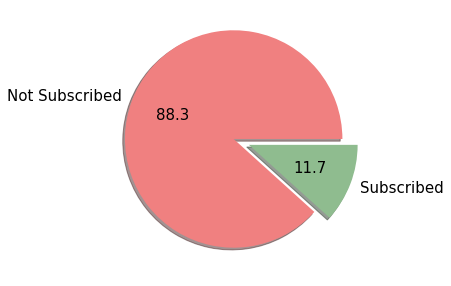

In [25]:
plt.figure(figsize=(8,5))
plt.pie(x=y_train.value_counts(),labels=['Not Subscribed','Subscribed'],explode=[0.1,0.05],
        autopct='%0.1f',colors=['lightcoral','darkseagreen'],shadow=True,textprops = {"fontsize":15})
plt.show

### The data is imbalanced 

## Data Optimization

In [26]:
Processed_Data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [27]:
from imblearn.over_sampling import SMOTE
balanced = SMOTE()

X_balanced , y_balanced = balanced.fit_resample(X,y)

In [28]:
Optimized_Data=X_balanced.copy()
Optimized_Data['y']=y_balanced

In [29]:
Optimized_Data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous,y
0,4,1,2,0,1,0,2,8,3,58,2143,5,261,1,1000,0,0
1,9,2,1,0,1,0,2,8,3,44,29,5,151,1,1000,0,0
2,2,1,1,0,1,1,2,8,3,33,2,5,76,1,1000,0,0
3,1,1,3,0,1,0,2,8,3,47,1506,5,92,1,1000,0,0
4,11,2,3,0,0,0,2,8,3,33,1,5,198,1,1000,0,0


In [30]:
X_train_Opt,X_test_Opt,y_train_Opt,y_test_Opt=train_test_split(X_balanced,y_balanced, test_size=0.2,random_state=123)

print(X_train_Opt.shape)
print(y_train_Opt.shape)

(63875, 16)
(63875, 1)


In [31]:
Classifier_Model_Opt=LogisticRegression()

In [32]:
Classifier_Model_Opt.fit(X_train_Opt,y_train_Opt)

LogisticRegression()

In [33]:
Optimized_Data['y_predicted']=Classifier_Model_Opt.predict(X_balanced)

In [34]:
accuracy_score(y_test_Opt,Classifier_Model_Opt.predict(X_test_Opt))

0.7927234015905817

In [35]:
confusion_matrix(y_test_Opt,Classifier_Model_Opt.predict(X_test_Opt))

array([[6487, 1549],
       [1761, 6172]], dtype=int64)

#### Train Data

In [36]:
print(classification_report(y_train_Opt,Classifier_Model_Opt.predict(X_train_Opt)))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     31886
           1       0.80      0.77      0.79     31989

    accuracy                           0.79     63875
   macro avg       0.79      0.79      0.79     63875
weighted avg       0.79      0.79      0.79     63875



#### Test Data

In [37]:
print(classification_report(y_test_Opt,Classifier_Model_Opt.predict(X_test_Opt)))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      8036
           1       0.80      0.78      0.79      7933

    accuracy                           0.79     15969
   macro avg       0.79      0.79      0.79     15969
weighted avg       0.79      0.79      0.79     15969



The auc score is: 0.7894446828787918


Text(0, 0.5, 'True Positive Rate / Sensitivity')

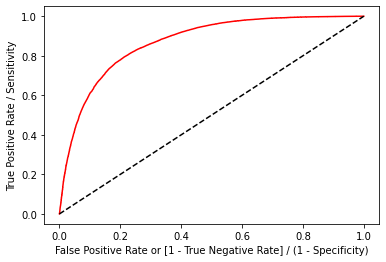

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train_Opt, Classifier_Model_Opt.predict_proba(X_train_Opt)[:,1])

auc=roc_auc_score(y_train_Opt, Classifier_Model_Opt.predict(X_train_Opt))
print("The auc score is:",auc)

plt.plot(fpr, tpr, color='red', label='logistict model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate] / (1 - Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')

## Model Deployment

In [39]:
from pickle import dump,load
dump(Classifier_Model_Opt,open('Intel_On_Subscription.pkl','wb'))

In [40]:
Loaded_Int=load(open('Intel_On_Subscription.pkl','rb'))
Loaded_Int.predict(X_test_Opt.head())

array([0, 0, 0, 1, 0])